##Imports

In [3]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 2.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


     |████████████████████████████████| 30.6MB 155kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
!pip install imutils
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.4)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import imutils
import sys

%matplotlib inline

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/4DSight/'

plots = root_path + 'Images/'

Mounted at /content/gdrive


##Function

In [4]:
'''
Takes two argument, first one is image file that contains the star map, and the second one is the patch from this star map.
'''
def find_star_location(starmap, smallstar):

  good_match_ratio = 0.3

  plt.imshow(starmap)
  plt.show()
  plt.imshow(smallstar)
  plt.show()

  gray1 = cv2.cvtColor(starmap, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(smallstar, cv2.COLOR_BGR2GRAY)

  sift = cv2.xfeatures2d.SIFT_create()
  keypoints_1, desc_1= sift.detectAndCompute(starmap,None)
  keypoints_2, desc_2 = sift.detectAndCompute(smallstar,None)  

  img_1 = cv2.drawKeypoints(gray1,keypoints_1,starmap)
  img_2 = cv2.drawKeypoints(gray2,keypoints_2,smallstar)
  plt.imshow(img_1)
  plt.show()
  plt.imshow(img_2)
  plt.show()

  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
  matches = bf.match(desc_1,desc_2)
  matches = sorted(matches, key = lambda x:x.distance)

  numGoodMatches = int(len(matches) * good_match_ratio)
  matches = matches[:numGoodMatches]

  img3 = cv2.drawMatches(starmap, keypoints_1, smallstar, keypoints_2, matches, smallstar, flags=2)
  plt.imshow(img3)
  plt.show()

  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints_1[match.queryIdx].pt
    points2[i, :] = keypoints_2[match.trainIdx].pt

  h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
  height, width, channels = starmap.shape
  im1Reg = cv2.warpPerspective(smallstar, h, (width, height))

  plt.imshow(im1Reg)
  plt.show()
  plt.imshow(starmap)
  plt.show()

  x, y, _ = smallstar.shape
  old_points = np.array([
                        [0,0,1],
                        [y,0,1],
                        [0,x,1],
                        [y,x,1]
  ])
  new_points = np.dot(old_points, h.T)
  new_points = new_points.astype('int64')

  return new_points[:,:-1]

##Image Read and Keypoints

In [5]:
#reading image
img1 = cv2.imread(plots + 'Canopus.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2 = cv2.imread(plots + 'T.png')  
# gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

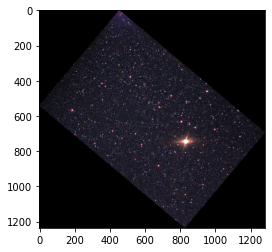

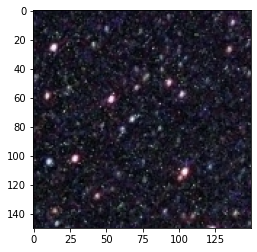

In [6]:
img1_rot = imutils.rotate_bound(img1, 40)
img2_det = img1_rot[200:350, 350:500]
img2 = img2_det
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img1_rot)
plt.show()
plt.imshow(img2)
plt.show()

In [7]:
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, desc_1= sift.detectAndCompute(img1,None)
keypoints_2, desc_2 = sift.detectAndCompute(img2,None)

In [8]:
# orb = cv2.ORB_create()
# keypoints_1, desc_1 = orb.detectAndCompute(img1,None)
# keypoints_2, desc_2 = orb.detectAndCompute(img2,None)

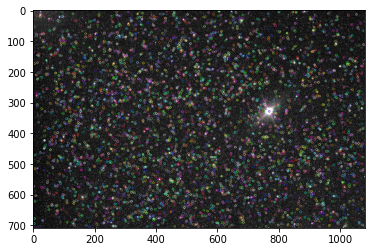

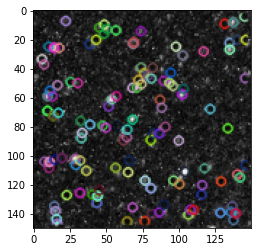

In [9]:
img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
img_2 = cv2.drawKeypoints(gray2,keypoints_2,img2)
plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()

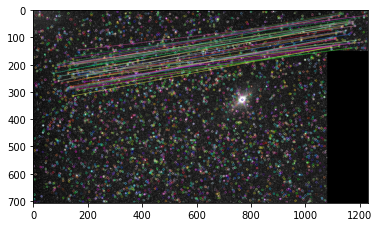

In [10]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(desc_1,desc_2)
matches = sorted(matches, key = lambda x:x.distance)

numGoodMatches = int(len(matches) * 0.3)
matches = matches[:numGoodMatches]

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches, img2, flags=2)
plt.imshow(img3)
plt.show()

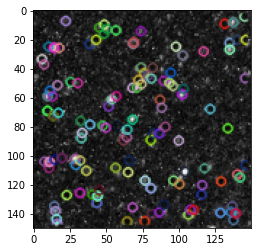

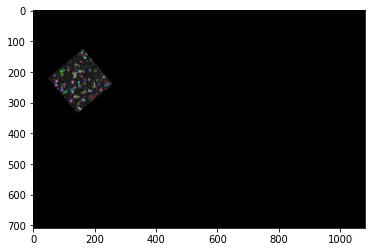

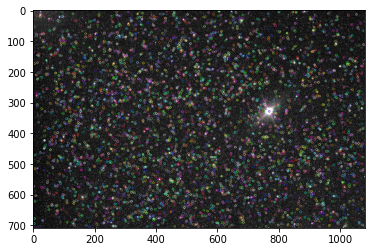

In [11]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints_1[match.queryIdx].pt
  points2[i, :] = keypoints_2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
height, width, channels = img1.shape
im1Reg = cv2.warpPerspective(img2, h, (width, height))

plt.imshow(img2)
plt.show()
plt.imshow(im1Reg)
plt.show()
plt.imshow(img1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 48.3595375  220.99089168   1.        ]
 [162.89091441 124.18500293   0.99774621]
 [144.86746146 336.15832432   1.00124067]
 [259.39883837 239.35243557   0.99898688]]


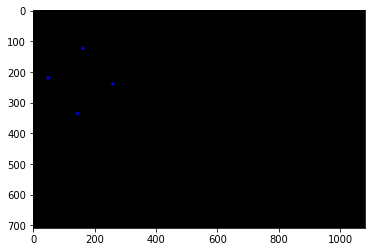

In [12]:
x, y, _ = img2.shape
old_points = np.array([
                       [0,0,1],
                       [y,0,1],
                       [0,x,1],
                       [y,x,1]
])
new_points = np.dot(old_points, h.T)
print(new_points)

dum = np.zeros(img1.shape)
cv2.circle(dum, (48, 220), 5, (0, 0, 255), -1)
cv2.circle(dum, (162, 124), 5, (0, 0, 255), -1)
cv2.circle(dum, (144, 336), 5, (0, 0, 255), -1)
cv2.circle(dum, (259, 239), 5, (0, 0, 255), -1)
plt.imshow(dum)
plt.show()

##Trial

In [13]:
image_path_1 = sys.argv[0]
image_path_1 = sys.argv[1]

In [23]:
starmap = cv2.imread(plots + 'Canopus.jpg')  
smallstar = cv2.imread(plots + 'smallstar.png') 
img1_rot = imutils.rotate_bound(starmap, 30)
smallstar = img1_rot[200:350, 350:500]
# cv2.imwrite(plots + 'smallstar.png', smallstar) 

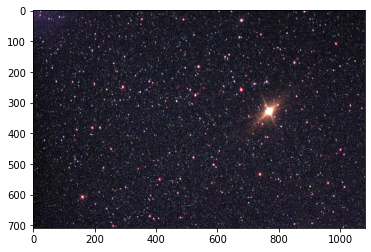

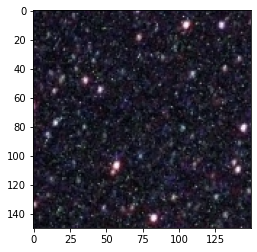

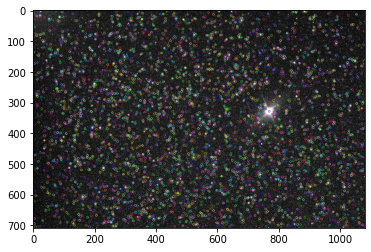

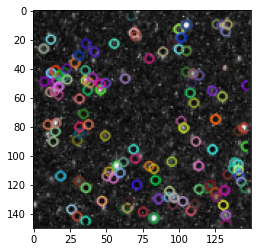

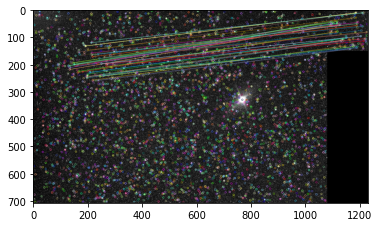

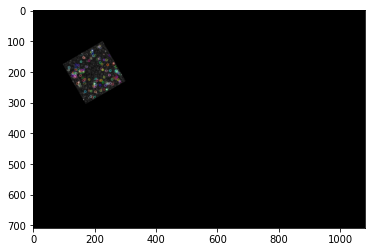

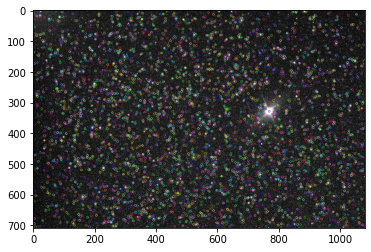

array([[ 96, 175],
       [226, 100],
       [171, 305],
       [300, 229]])

In [24]:
find_star_location(starmap, smallstar)

##Template Matching

In [16]:
img_rgb = cv2.imread(plots + 'starmap.png')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

# template = cv2.imread(plots + 'cropstars.png',0) 

template = img_gray[100:200, 300:400]
# cv2.imwrite(root_path+'temp.png', template) 

w, h = template.shape[::-1] 
  
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 
  
threshold = 0.9
loc = np.where( res >= threshold)  

for pt in zip(*loc[::-1]): 
    img_rgb = cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 
 
plt.imshow(img_rgb)
plt.show()

error: ignored